# SF-DAT-21 | Unit Project 2

In this project, you will implement the exploratory analysis plan developed in Unit Project 1.  This will lay the groundwork for our our first modeling exercise in Unit Project 3.

### Step 1: Load the python libraries you will need for this project

In [11]:
# imports
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as pl
%matplotlib inline

### Step 2: Read in your data set

In [15]:
# read in data from source
df_raw = pd.read_csv("../datasets/admissions.csv")
df_raw.head()

,admit,gre,gpa,prestige
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


## Questions
#### Question 1. How many observations are in our dataset?


In [16]:
df_raw.count()

admit       400
gre         398
gpa         398
prestige    399
dtype: int64

Answer:

#### Question 2. Create a summary table.

In [17]:
# function
df_raw.describe()

,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,520.000000,3.13000,2.000000
50%,0.000000,580.000000,3.39500,2.000000
75%,1.000000,660.000000,3.67000,3.000000
max,1.000000,800.000000,4.00000,4.000000


#### Question 3. Why would GRE have a larger STD than GPA?

Answer: Beacuse the range of the gre(220-800) and gpa (2-4). Where Gre have a higher variation than gpa which leads to higher std for gre comparing to gpa.

#### Question 4. Drop data points with missing data.


In [28]:
df_raw.drop(df_raw[df_raw.gre.isnull() | df_raw.gpa.isnull() | df_raw.prestige.isnull()].index, inplace= True)

#### Question 5. Confirm that you dropped the correct data.  How can you tell?

Answer: We calculate the count for the data frame and it should be decreased after dropping these rows

In [30]:
df_raw.count()

admit       397
gre         397
gpa         397
prestige    397
dtype: int64

#### Question 6. Create box plots for GRE and GPA.

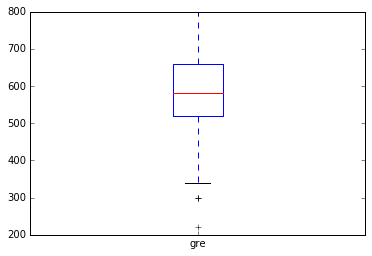

In [31]:
# boxplot 1
df_raw[ ['gre'] ].plot(kind = 'box')

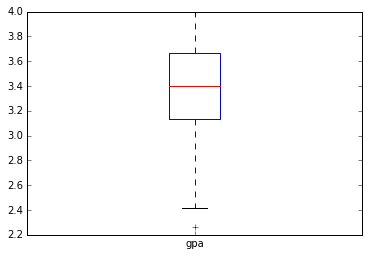

In [32]:
# boxplot 2
df_raw[ ['gpa'] ].plot(kind = 'box')

#### Question 7. What do this plots show?

Answer: m: the minimum acceptable value
        M: the maximum acceptable value 
        Median: the value in the middle Q(0.5)
        Q1: the value for Q(0.25)
        Q3: the value for Q(0.75)
        IQR (Range)= Q3 - Q1 

#### Question 8. Describe each distribution.

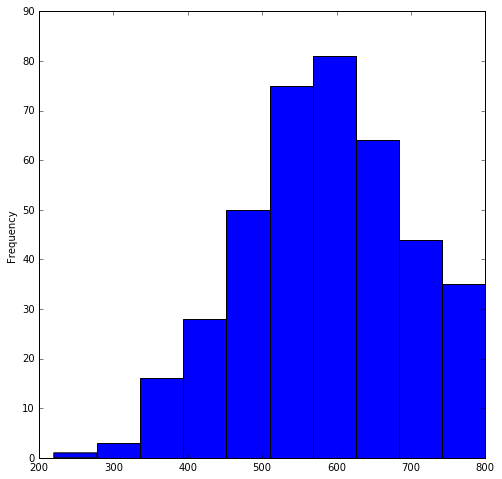

In [38]:
# plot the distribution of each variable
df_raw.gre.plot(kind = 'hist', figsize = (8, 8))
#for GRE:
#        m ~ 300
#        M ~ 800
#        Symmetrically distributed with Two outliers


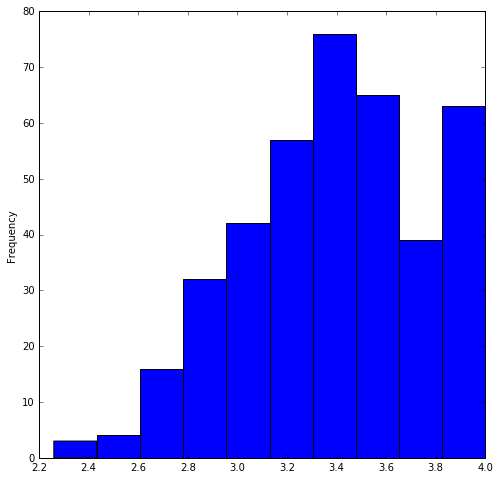

In [39]:
#for GPA: 
#        m ~ 2.5 
#        M ~ 3.7
#        Symmetrically distributed with one outlier

df_raw.gpa.plot(kind = 'hist', figsize = (8, 8))

#### Question 9. If our model had an assumption of a normal distribution would we meet that requirement?

Answer: the column GRE would be more suitable to fit the normal distribution model

#### Question 10. Does this distribution need correction?  If so, why?  How?

In [42]:
df_raw.corr()

,admit,gre,gpa,prestige
admit,1.000000,0.181202,0.174116,-0.243563
gre,0.181202,1.000000,0.382408,-0.124533
gpa,0.174116,0.382408,1.000000,-0.060976
prestige,-0.243563,-0.124533,-0.060976,1.000000


* Answer: Maybe by removing outliers we can better fit gpa into the normal distribution model 
* there is a higher correlation between gpa and gre

#### Question 11. Which of our variables are potentially colinear?

In [43]:
# create a correlation matrix for the data
df_raw.corr()

,admit,gre,gpa,prestige
admit,1.000000,0.181202,0.174116,-0.243563
gre,0.181202,1.000000,0.382408,-0.124533
gpa,0.174116,0.382408,1.000000,-0.060976
prestige,-0.243563,-0.124533,-0.060976,1.000000


#### Question 12. What did you find?

Answer: it seems that the higher colinearity is between gpa and gre (0.38). Also there could be a negative correlation between (prestige and admit)

#### Question 13. Write an analysis plan for exploring the association between grad school admissions rates and prestige of undergraduate schools.

Answer: Predict candidates admission into the UCLA graduate school using prestige based on admission data from UCLA's Logit Regression in R tutorial.

#### Question 14. What is your hypothesis?

Answer: Presitge data may help predicting admission into graduate school. It seems that there is a negative correlation between prestige and admission 

## Bonus/Advanced

#### 1. Bonus: Explore alternatives to dropping obervations with missing data.

The three possibilities are to ignore the issue, fill in the missing items, or remove (drop) the missing entries from the dataset. 

#### 2. Bonus: Log transform the skewed data.

In [59]:
#signedlog10 = function(x) {
#ifelse(abs(x) <= 1, 0, sign(x)*log10(abs(x)))}
import math
df_raw_log = np.log(df_raw, dtype='float64')

#### 3. Advanced: Impute missing data.

In [63]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import Imputer
imp = Imputer(missing_values='NaN',
    strategy='mean', axis=0)
imp.fit(df_raw)
x = pd.Series(imp.transform(df_raw).tolist()[0])
print x

0      0.00
1    380.00
2      3.61
3      3.00
dtype: float64
